# 0.0 Basic Concept, Maximal Margin Classifier  

Maximal Margin Classifiers are super sensitive to outliers in the training data.   
![Bias Tradeoff Example](BiasTradeoff.JPG)    

# 0.1 Soft Margin  
![Soft Margin](SoftMargin.JPG)  

We use Cross Validation to determine how many misclassifications and obseravtions to allow inside of the Soft Margin to get the best classification. 
The name Supported Vector Classifier comes from the fact that the observations on the edge and within the Soft Margin are called Support Vectors.   

# 0.2 Supported Vector Classifier    
![Support Vectors](SupportVectors.JPG)  

But Supported Vector Classifier can't hadnel problem like this below:  

![Misclassifications](Misclassifications.JPG)  

And that's why we need Supported Vector Machines

# 0.3 Supported Vector Machines
![Supported Vector Machines](SupportedVectorMachines.JPG)  

# 0.4 Polynomial Kernel
![Polynomial kernel](PolynomialKernel.JPG)   
'a' and 'b' refer to two different observations in the dataset. 'r' determines the coefficient of the polynomial 

How a Kernel Function systematically finds Support Vector Classifiers in higher dimensions  

If we use Polynomial Kernel, which has a parameter d, which stands for the degree of the polynomial. When d = 1 the Polynomial Kernel computes
the relationships between each pair of observations in 1-Dimension and this realtionships are used to find a Support Bector Classifier   

![Polynomial Kernel 2-Dim](PolynomialKernel2Dim.JPG)

Last but not least we can find good value for 'r' and 'd' with cross validation.

![Polynomial Kernel 2-Dim](PolynomialKernel2.JPG)  
![Polynomial Kernel 2-Dim](PolynomialKernel3.JPG)  

Kernel functions only calculate the relationships between every pair of points as if they are in the higher dimensions - they don't
actually do the transformation and it's called **Kernel Trick**

Matplotlib is building the font cache; this may take a moment.


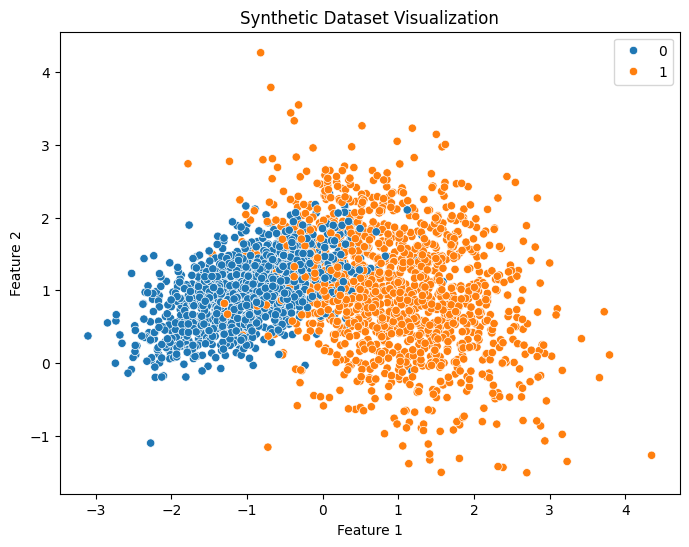

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time

RANDOM_STATE = 254687
N_SAMPLES = 2587
N_FEATURES = 2
N_CLASSES = 2

class SyntheticDataset:
    """A class to generate and preprocess synthetic datasets for classification task."""

    def __init__(self, random_state: int, n_samples: int, n_features: int, n_classes: int):
        """
        Initialize the SyntheticDataset class.

        :param random_state: Seed for random number generation.
        :param n_samples: Number of samples to generate.
        :param n_features: Number of features for the dataset.
        :param n_classess: Number of classes for the target variable.
        """
        self.random_state = random_state
        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = n_classes 
        self.X = None
        self.y = None

    def generate(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Generate a synthetic dataset using make_classification
        
        :return: A tuple containing the feature matrix (X) and target vector (y)
        """
        self.X, self.y = make_classification(
            n_samples=self.n_samples,
            n_features=self.n_features,
            n_informative=self.n_features,
            n_redundant=0,
            n_clusters_per_class=1, # single-mod means one cluster per class
            random_state=self.random_state
        )
        return self.X, self.y
    
    def normalize(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Normalize the feature matrix (X) and target vector(y) to the range [0,1] 

        :return: A tuple containing the normalized feature matrix (X) and target vector (y)
        """
        if self.X is not None:
            min_x, max_x = self.X.min(), self.X.max()
            self.X = (self.X-min_x)/(max_x-min_x)

        if self.y is not None:    
            min_y, max_y = self.y.min(), self.y.max()
            self.y = (self.y-min_y)/(max_y-min_y)

        return self.X, self.y
    
    def visualize(self): 
        """ Visualize the dataset using a scatter plot"""
        if self.X is not None and self.y is not None:
            plt.figure(figsize=(8,6))
            sns.scatterplot(x=self.X[:,0], y=self.X[:,1], hue=self.y)
            plt.title("Synthetic Dataset Visualization")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.show()
        else:
            print("Dataset not generated yet. Call generate() first.")

    
dataset = SyntheticDataset(RANDOM_STATE, N_SAMPLES, N_FEATURES, N_CLASSES)
X, y = dataset.generate() # X is size of (n_samples x n_features) and y is size of (n_samples,) 
dataset.visualize()

In [3]:
# Normalization of datasets 
X_norm, y_norm = dataset.normalize()

# Dividing dataset on a trening set and test set 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=RANDOM_STATE) # 80% training set, 20% test set

$${Prize Function: } \quad
\sum_{i} \lambda_i - \frac{1}{2} \sum_{i} \sum_{j} \lambda_i \lambda_j y_i y_j x_i^\top x_j$$


$\sum_{i} \lambda_i$ : This is the sum of the Lagrange multipliers $\lambda_i$ which represents the weights assigned to each training sample